In [21]:
import pandas as pd
import numpy as np
import re
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar
from pyecharts.charts import Pie
import jieba
from nltk import FreqDist
import wordcloud
from matplotlib import pyplot as plt
# 导入相关的模块

In [4]:
df = pd.read_csv(r"D:\scrapy文件\处理好的数据.csv")

In [5]:
def create_pie(datas, title):
    pie = Pie()
    pie.add("", datas)
    pie.set_global_opts(
        title_opts=opts.TitleOpts(title=title),
        legend_opts=opts.LegendOpts(pos_right="right")
    )
    pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}-{d}%"))
    return pie
# 设置饼图通用模型

In [9]:
# 展示热门岗位
data_title = df["职位"].value_counts()
data1 = list(zip(data_title.index.to_list(), data_title.to_list()))
pie = create_pie(data1, "热门岗位")
pie.render_notebook()

In [11]:
# 展示学历要求
data_edu = df["学历"].value_counts()
data2 = list(zip(data_edu.index.to_list(), data_edu.to_list()))
pie = create_pie(data2, "学历要求")
pie.render_notebook()

In [16]:
# 展示工作经验
data_exp = df["工作经验"].value_counts()
data3 = list(zip(data_exp.index.to_list(), data_exp.to_list()))
pie = create_pie(data3, "工作经验要求")
pie.render_notebook()

In [15]:
# 热门城市，只展示前20个
data_location = df["工作地点"].value_counts()[:20]
datas = list(zip(data_location.index.to_list(), data_location.to_list()))
pie = create_pie(datas, "热门城市的岗位数量")
pie.render_notebook()

In [25]:
# 公司类型
data_type = df["公司类型"].value_counts()
data4 = list(zip(data_type.index.to_list(), data_type.to_list()))
pie = create_pie(data4, "公司类型")
pie.render_notebook()

In [31]:
# 公司规模
data_type = df["公司规模"].value_counts()
data5 = list(zip(data_type.index.to_list(), data_type.to_list()))
pie = create_pie(data5, "公司规模")
pie.render_notebook()

In [17]:
# 设置柱状图的颜色变化
color_function = """
        function (params) { 
            var colorList = [ 
            '#808000','#EFE42A','#64BD3D','#EE9201','#29AAE3', 
            '#B74AE5','#0AAF9F','#E89589','#FF6666','#C33531']; 
            return colorList[params.dataIndex] 
        }
        """

In [22]:
# 热门岗位的工资对比，取前10个
salary_data = df.groupby(by="职位").mean()["平均工资"].sort_values(ascending=False)[:10]
salary_data = salary_data.sort_values().astype(np.int)
bar = (
    Bar()
    .add_xaxis(salary_data.index.tolist())
    .add_yaxis("工资",salary_data.tolist(), itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_function)))
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="热门岗位工资对比"))
)
bar.render_notebook()

In [23]:
# 热门城市的工资对比，取前10个
address_list = ['北京', '上海', '广州', '深圳', '杭州', '南京',
                '苏州',  '武汉', '成都', '西安']
address_list = np.array(address_list)
index = [df["工作地点"].str.count(i) for i in address_list]
index = np.array(index).sum(axis=0) > 0
df1 = df[index]
salary_data = df1.groupby(by="工作地点").mean()["平均工资"].sort_values(ascending=False)[:10]
salary_data = salary_data.sort_values().astype(np.int)
bar = (
    Bar()
    .add_xaxis(salary_data.index.tolist())
    .add_yaxis("工资",salary_data.tolist(), itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_function)))
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="热门城市工资对比"))
)
bar.render_notebook()

In [32]:
salary_data = df.groupby(by="公司类型").mean()["平均工资"].sort_values(ascending=False)
salary_data = salary_data.sort_values().astype(np.int)
bar = (
    Bar()
    .add_xaxis(salary_data.index.tolist())
    .add_yaxis("工资",salary_data.tolist(), itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_function)))
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="公司类型工资对比"))
)
bar.render_notebook()

In [46]:
# 展示热门"行业"对比，由于一家公司可能有多个行业标签，故先分开进行统计
df1 = df.loc[df["行业"].notna()]  #删除某一列"行业"中的的空值
temp_list = df1["行业"].apply(lambda x: re.split('[/,]',x))
temp_list = temp_list.tolist()
field_list = list(set([i for j in temp_list for i in j]))
# 创建一个全为0的ndarray数组来存储行业信息
zero_df = pd.DataFrame(np.zeros((df1.shape[0], len(field_list))), columns=field_list)
for i in range(df1.shape[0]):
    # 给每个行业出现的位置赋值1
    zero_df.loc[i, temp_list[i]] = 1  # 按行、列标签进行索引
field_count = zero_df.sum(axis=0).sort_values(ascending=False)[:10]  #统计各行数据累加并排序

In [48]:
field_count = field_count.sort_values()
bar = (
    Bar()
    .add_xaxis(field_count.index.tolist())
    .add_yaxis("行业",field_count.tolist(), itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_function)))
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="热门行业"))
)
bar.render_notebook()

In [53]:
# 对"职位描述"进行切词处理
df1 = df[df["岗位描述"].notna()]
decribe_list = df1["岗位描述"].tolist()
# print(decribe_list)
decribe_wordcut = []
for i in decribe_list:
        wordcuts = jieba.lcut(i)
        decribe_wordcut += wordcuts
# 统计切词后的词频，保存到字典freq1里
freq = FreqDist(decribe_wordcut)
freq1 = {}
for k in freq:
    if len(k) >= 2 and freq[k] > 1:  # 删掉长度为1的词，和词频为1的词
        freq1[k] = freq[k]
# print(freq1)

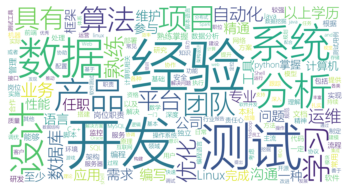

In [54]:
del freq1["熟悉"]
del freq1["工作"]
del freq1["使用"]
del freq1["要求"]
del freq1["优先"]
del freq1["相关"]
del freq1["能力"]
del freq1["技术"]
del freq1["以上"]
del freq1["具备"]
del freq1["进行"]
del freq1["良好"]
del freq1["负责"]
del freq1["了解"]
del freq1["Python"]
# 删除一些不能给出信息的词语

ccloud = wordcloud.WordCloud(background_color='white', width=3000, height=1600,font_path=r"C:\Windows\FONTS\MSYHL.TTC")
ccloud.generate_from_frequencies(frequencies=freq1)
plt.figure()
plt.imshow(ccloud, interpolation="bilinear")
plt.axis('off')
plt.show()